In [1]:
# Libraries
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading in the DataSet
df = pd.read_csv("C:/Users/lenny/Documents/Data-Science-Assignment2/cars.csv", sep = ';')

#removed the row that desribed the type of each column
data = df.drop(df.index[[0]])

#removed the column that described the car model
cars = data.drop("Car",axis = 1)
cars.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,18.0,8,307.0,130.0,3504.,12.0,70,US
2,15.0,8,350.0,165.0,3693.,11.5,70,US
3,18.0,8,318.0,150.0,3436.,11.0,70,US
4,16.0,8,304.0,150.0,3433.,12.0,70,US
5,17.0,8,302.0,140.0,3449.,10.5,70,US


In [3]:
X = cars[["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model",]].values
y = cars["Origin"].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
X = np.asfarray(X, dtype='float')

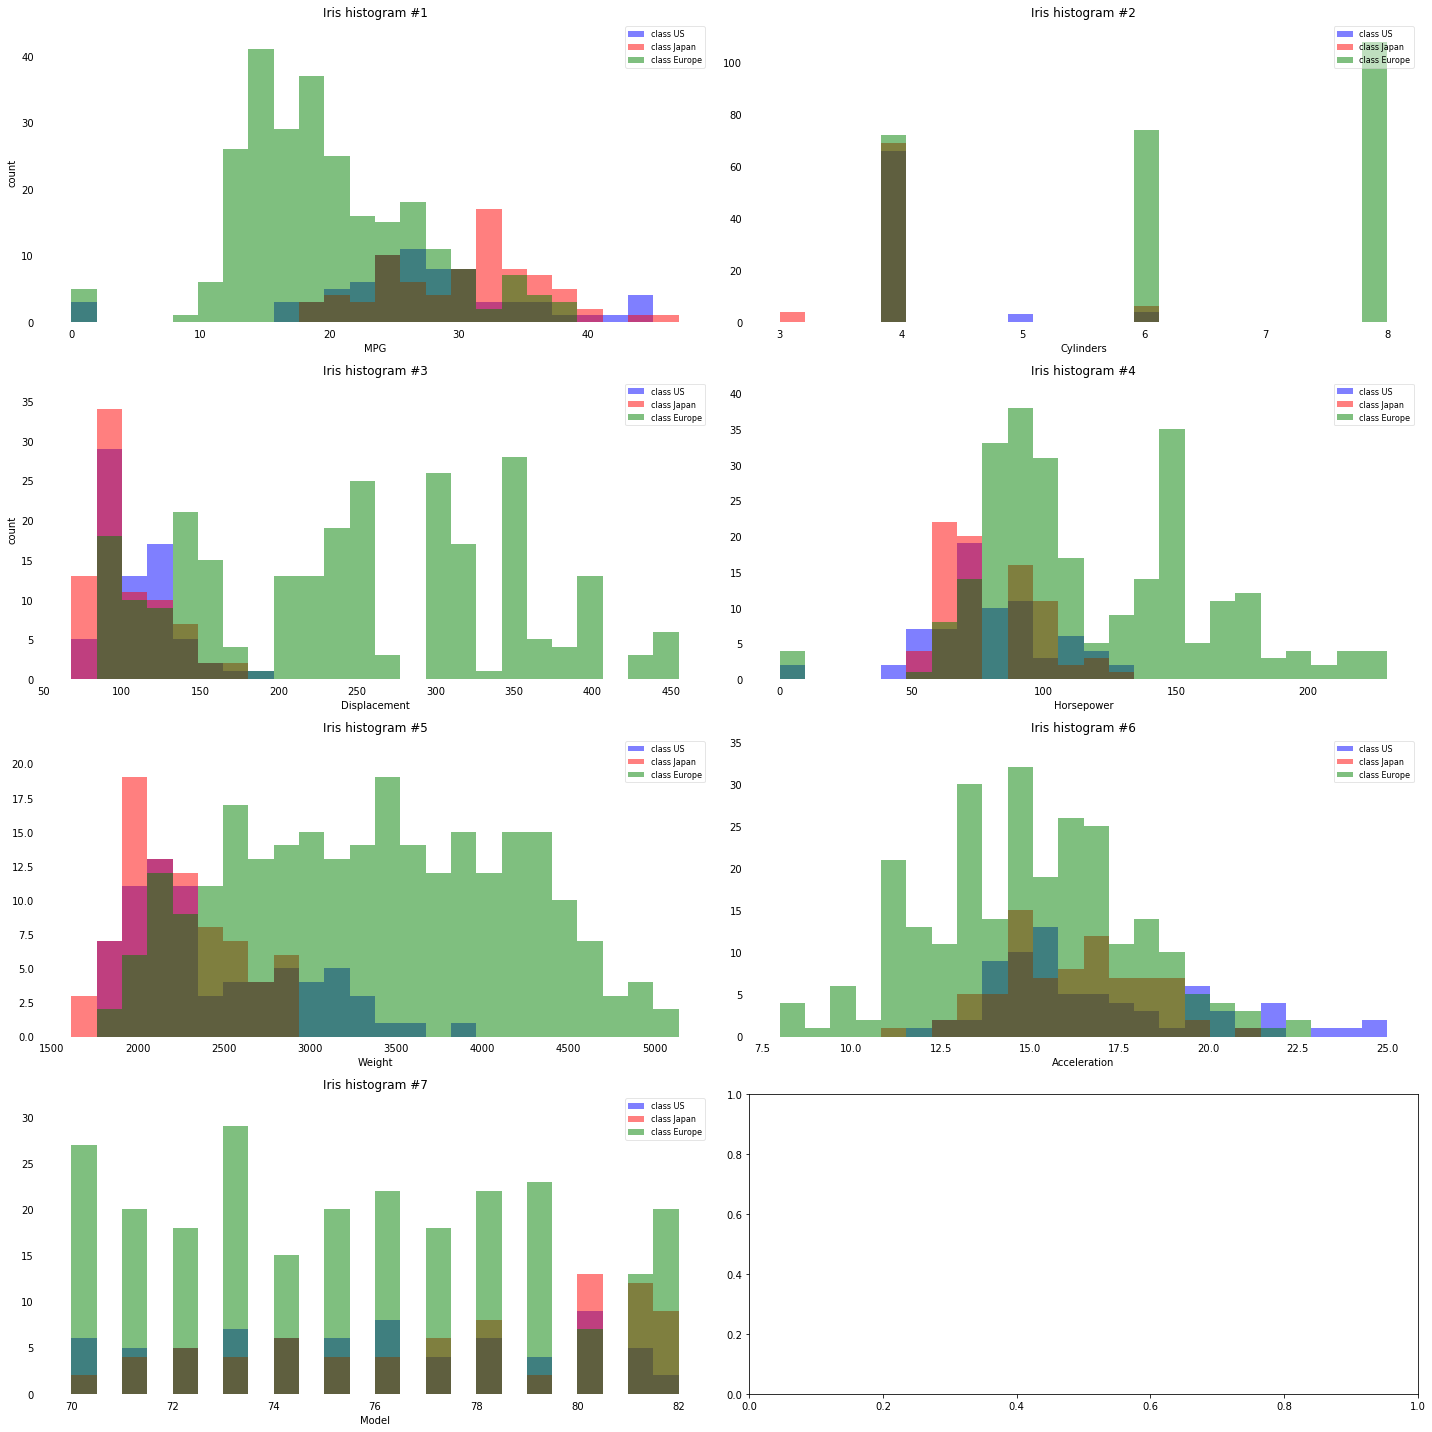

In [4]:
feature_dict = {i:label for i, label in zip(range(7),
                                         ("MPG","Cylinders","Displacement","Horsepower",
                                          "Weight","Acceleration","Model"))}

label_dict = {1:'US', 2: 'Japan', 3: 'Europe'}


                          # 4 rows #2 columns --> this spreads the data in a more organized way, we could do 1 column but messy
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20)) #figsize (x, y)

for ax,cnt in zip(axes.ravel(), range(7)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [5]:
# Beginning Linear Discriminant Analysis

In [6]:
# Step 1
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [   26.7452     4.1507   109.4658    78.7808  2431.4932    16.8219
    75.7397]

Mean Vector class 2: [   30.4506     4.1013   102.7089    79.8354  2221.2278    16.1722
    77.443 ]

Mean Vector class 3: [   19.6882     6.2835   247.935    118.0118  3372.7008    14.9425    75.5   ]



In [7]:
# Step 2: Compute the WITHIN - Class Scatter Matrix

In [8]:
S_W = np.zeros((7,7))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((7,7))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(7,1), mv.reshape(7,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[  2.0395e+04  -2.4347e+03  -1.5063e+05  -6.7298e+04  -1.3428e+06
    2.8236e+03   6.2775e+03]
 [ -2.4347e+03   7.4412e+02   4.0093e+04   1.5200e+04   3.0978e+05
   -7.0038e+02  -7.0368e+02]
 [ -1.5063e+05   4.0093e+04   2.5398e+06   9.8249e+05   1.9325e+07
   -4.5821e+04  -4.5180e+04]
 [ -6.7298e+04   1.5200e+04   9.8249e+05   5.2264e+05   7.8315e+06
   -2.5681e+04  -2.1764e+04]
 [ -1.3428e+06   3.0978e+05   1.9325e+07   7.8315e+06   1.8394e+08
   -2.6477e+05  -2.7961e+05]
 [  2.8236e+03  -7.0038e+02  -4.5821e+04  -2.5681e+04  -2.6477e+05
    2.9408e+03   1.1624e+03]
 [  6.2775e+03  -7.0368e+02  -4.5180e+04  -2.1764e+04  -2.7961e+05
    1.1624e+03   5.4610e+03]]


In [9]:
# Between Class Scatter Matrix

In [10]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((7,7))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(7,1) # make column vector
    overall_mean = overall_mean.reshape(7,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[  8.1942e+03  -1.8507e+03  -1.2223e+05  -3.2895e+04  -9.2690e+05
    1.2256e+03   1.2005e+03]
 [ -1.8507e+03   4.4313e+02   2.9155e+04   7.9379e+03   2.1601e+05
   -3.1522e+02  -2.3411e+02]
 [ -1.2223e+05   2.9155e+04   1.9187e+06   5.2201e+05   1.4237e+07
   -2.0649e+04  -1.5626e+04]
 [ -3.2895e+04   7.9379e+03   5.2201e+05   1.4234e+05   3.8558e+06
   -5.6971e+03  -4.0701e+03]
 [ -9.2690e+05   2.1601e+05   1.4237e+07   3.8558e+06   1.0662e+08
   -1.4882e+05  -1.2597e+05]
 [  1.2256e+03  -3.1522e+02  -2.0649e+04  -5.6971e+03  -1.4882e+05
    2.4204e+02   1.2294e+02]
 [  1.2005e+03  -2.3411e+02  -1.5626e+04  -4.0701e+03  -1.2597e+05
    1.2294e+02   2.3043e+02]]


In [11]:
# Step 3 solving for the generalized eigenvalue for the matrix

In [12]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(7,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))



Eigenvector 1: 
[[ 0.2526]
 [ 0.8895]
 [-0.0927]
 [ 0.0823]
 [ 0.0017]
 [-0.0856]
 [-0.3497]]
Eigenvalue 1: 1.04e+00

Eigenvector 2: 
[[-0.1316]
 [-0.8964]
 [-0.0236]
 [-0.0516]
 [ 0.0053]
 [ 0.0306]
 [-0.4183]]
Eigenvalue 2: 7.64e-02

Eigenvector 3: 
[[ 0.1113]
 [ 0.9479]
 [-0.0494]
 [ 0.1107]
 [ 0.0015]
 [ 0.1311]
 [-0.239 ]]
Eigenvalue 3: -1.62e-15

Eigenvector 4: 
[[-0.069 ]
 [-0.9185]
 [ 0.022 ]
 [ 0.0739]
 [-0.0042]
 [ 0.2921]
 [-0.2456]]
Eigenvalue 4: 1.07e-15

Eigenvector 5: 
[[-0.1274]
 [ 0.5848]
 [-0.0104]
 [-0.0215]
 [-0.0014]
 [-0.7733]
 [-0.2078]]
Eigenvalue 5: 1.00e-16

Eigenvector 6: 
[[-0.4958]
 [ 0.1495]
 [-0.0101]
 [ 0.0187]
 [-0.0029]
 [ 0.1441]
 [ 0.7307]]
Eigenvalue 6: -1.35e-16

Eigenvector 7: 
[[-0.4958]
 [ 0.1495]
 [-0.0101]
 [ 0.0187]
 [-0.0029]
 [ 0.1441]
 [ 0.7307]]
Eigenvalue 7: -1.35e-16


In [13]:
# Checks the eigenvector - eigenvalue calculation

In [14]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(7,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [15]:
# Selecting linear discriminants for the new feature space

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

1.03958087968
0.0764048551857
1.61892677173e-15
1.07363841714e-15
1.44894393138e-16
1.44894393138e-16
1.00119058818e-16


In [17]:
# We will use the 2 eigenvalues closest to zero

In [18]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 93.15%
eigenvalue 2: 6.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%


In [19]:
# Constructing the K x D dimensional eigenvector matrix W

In [20]:
eig_pairs

[(1.0395808796799615,
  array([ 0.2526+0.j,  0.8895+0.j, -0.0927+0.j,  0.0823+0.j,  0.0017+0.j,
         -0.0856+0.j, -0.3497+0.j])),
 (0.076404855185684378,
  array([-0.1316+0.j, -0.8964+0.j, -0.0236+0.j, -0.0516+0.j,  0.0053+0.j,
          0.0306+0.j, -0.4183+0.j])),
 (1.6189267717312139e-15,
  array([ 0.1113+0.j,  0.9479+0.j, -0.0494+0.j,  0.1107+0.j,  0.0015+0.j,
          0.1311+0.j, -0.2390+0.j])),
 (1.0736384171379932e-15,
  array([-0.0690+0.j, -0.9185+0.j,  0.0220+0.j,  0.0739+0.j, -0.0042+0.j,
          0.2921+0.j, -0.2456+0.j])),
 (1.4489439313822653e-16,
  array([-0.4958+0.0144j,  0.1495-0.4106j, -0.0101+0.0015j,  0.0187+0.0013j,
         -0.0029+0.0006j,  0.1441-0.0886j,  0.7307+0.j    ])),
 (1.4489439313822653e-16,
  array([-0.4958-0.0144j,  0.1495+0.4106j, -0.0101-0.0015j,  0.0187-0.0013j,
         -0.0029-0.0006j,  0.1441+0.0886j,  0.7307-0.j    ])),
 (1.0011905881828998e-16,
  array([-0.1274+0.j,  0.5848+0.j, -0.0104+0.j, -0.0215+0.j, -0.0014+0.j,
         -0.7733+0.j, 

In [21]:
# Eig_pairs is a list of tuples that consists of 1 value and 1 array
# we focus on the first two tuples, the remaining tuples are unecessary 
# information.

In [22]:
# So here we pass the 1 tuple and the 2 tuple and
# calculate W, which will reduce the dimensions of the data
W = np.hstack((eig_pairs[0][1].reshape(7,1), eig_pairs[1][1].reshape(7,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2526 -0.1316]
 [ 0.8895 -0.8964]
 [-0.0927 -0.0236]
 [ 0.0823 -0.0516]
 [ 0.0017  0.0053]
 [-0.0856  0.0306]
 [-0.3497 -0.4183]]


In [23]:
# transforming the samples onto the new subspace

In [24]:
# In continuation we have Y = X * W
# X is our original data
# W is 7 x 2 dimensional matrix that'll transform our samples onto the new subpsace
X_lda = X.dot(W)
assert X_lda.shape == (406,2), "The matrix is not 150x2 dimensional."

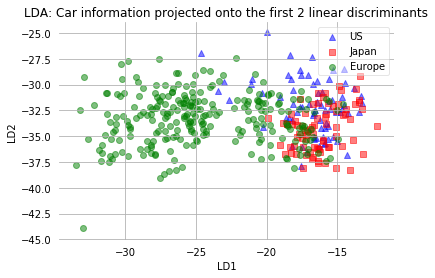

In [25]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,7),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Car information projected onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [26]:
# Comparison of PCA and LDA
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Car Information projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

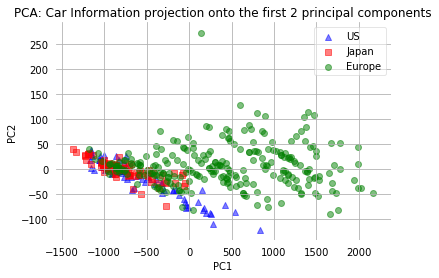

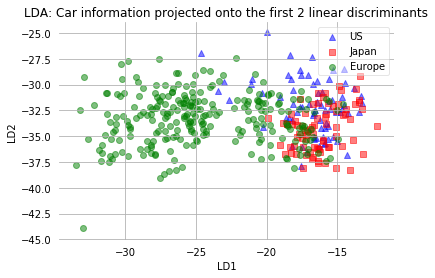

In [27]:
    plot_pca()
    plot_step_lda()

In [28]:
# LDA using Scikit-learn

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=7)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [30]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label] * -1,
                    y=X[:,1][y == label] * 1, 
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

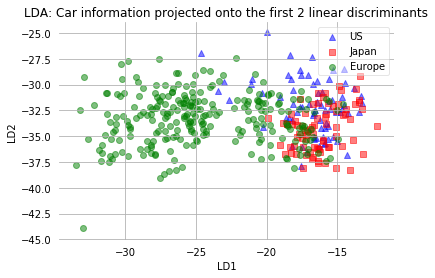

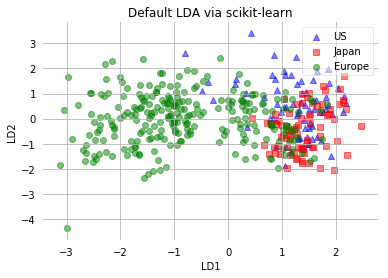

In [31]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [32]:
# Standardization: means centering and scaling 

In [36]:
X = cars[["MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model",]].values
y = cars["Origin"].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
X = np.asfarray(X, dtype='float')

In [37]:
X_cent = X - X.mean(axis=0)
X_std = X_cent / X.std(axis=0)

In [42]:
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))                 
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(7, 1) for i in range(0, n_comp)])
    return W

In [43]:
# Step 1) print the eigenvalues, eigenvectors, transformation matrix

In [44]:
S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W)

EigVals: [  1.0396e+00 +0.0000e+00j   7.6405e-02 +0.0000e+00j
  -1.6189e-15 +0.0000e+00j   1.0736e-15 +0.0000e+00j
   1.0012e-16 +0.0000e+00j  -1.3546e-16 +5.1418e-17j
  -1.3546e-16 -5.1418e-17j]

EigVecs: [[ 0.2526+0.j     -0.1316+0.j      0.1113+0.j     -0.0690+0.j     -0.1274+0.j
  -0.4958+0.0144j -0.4958-0.0144j]
 [ 0.8895+0.j     -0.8964+0.j      0.9479+0.j     -0.9185+0.j      0.5848+0.j
   0.1495-0.4106j  0.1495+0.4106j]
 [-0.0927+0.j     -0.0236+0.j     -0.0494+0.j      0.0220+0.j     -0.0104+0.j
  -0.0101+0.0015j -0.0101-0.0015j]
 [ 0.0823+0.j     -0.0516+0.j      0.1107+0.j      0.0739+0.j     -0.0215+0.j
   0.0187+0.0013j  0.0187-0.0013j]
 [ 0.0017+0.j      0.0053+0.j      0.0015+0.j     -0.0042+0.j     -0.0014+0.j
  -0.0029+0.0006j -0.0029-0.0006j]
 [-0.0856+0.j      0.0306+0.j      0.1311+0.j      0.2921+0.j     -0.7733+0.j
   0.1441-0.0886j  0.1441+0.0886j]
 [-0.3497+0.j     -0.4183+0.j     -0.2390+0.j     -0.2456+0.j     -0.2078+0.j
   0.7307+0.j      0.7307-0.j    ]]

W

C:\Users\lenny\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


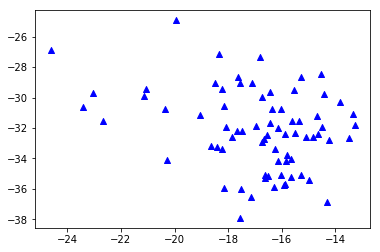

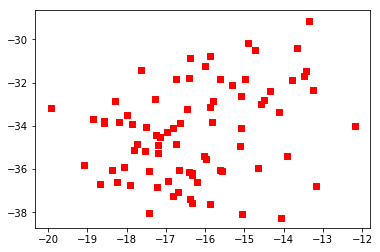

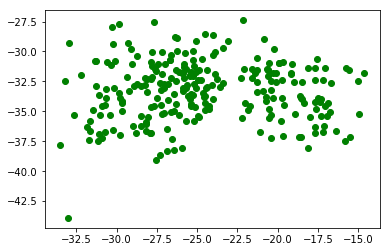

In [50]:
X_lda = X.dot(W)
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1],
                color=color, marker=marker)
    plt.show()

In [47]:
S_W, S_B = scatter_within(X_std, y), scatter_between(X_std, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W_std = get_components(eig_vals, eig_vecs, n_comp=2)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W_std)

EigVals: [  1.0396e+00 +0.0000e+00j   7.6405e-02 +0.0000e+00j
  -8.4767e-16 +0.0000e+00j   6.8554e-16 +0.0000e+00j
  -5.9526e-17 +6.7740e-17j  -5.9526e-17 -6.7740e-17j
   1.6053e-16 +0.0000e+00j]

EigVecs: [[-0.1967+0.j      0.1820+0.j     -0.0074+0.j      0.2379+0.j
  -0.3751+0.1271j -0.3751-0.1271j -0.3067+0.j    ]
 [-0.1412+0.j      0.2525+0.j      0.4750+0.j     -0.6758+0.j     -0.5633+0.j
  -0.5633-0.j     -0.2396+0.j    ]
 [ 0.9013+0.j      0.4077+0.j     -0.7996+0.j      0.3151+0.j
   0.2640-0.0503j  0.2640+0.0503j  0.0716+0.j    ]
 [-0.3090+0.j      0.3437+0.j      0.3397+0.j      0.2229+0.j
   0.5040+0.0848j  0.5040-0.0848j -0.6540+0.j    ]
 [-0.1351+0.j     -0.7429+0.j      0.1354+0.j      0.5135+0.j
  -0.3558+0.0285j -0.3558-0.0285j  0.4130+0.j    ]
 [ 0.0222+0.j     -0.0141+0.j      0.0332+0.j      0.2250+0.j
   0.0642-0.0737j  0.0642+0.0737j -0.2220+0.j    ]
 [ 0.1215+0.j      0.2581+0.j     -0.0045+0.j      0.1534+0.j
   0.1752-0.1574j  0.1752+0.1574j  0.4425+0.j    ]]

W

C:\Users\lenny\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


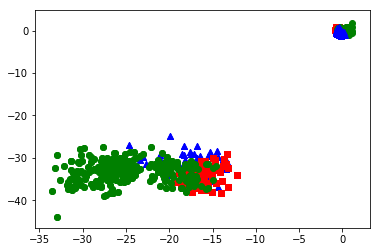

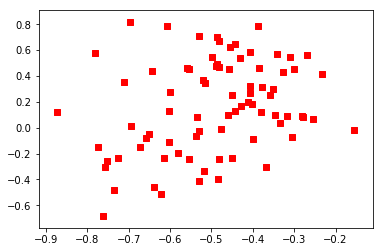

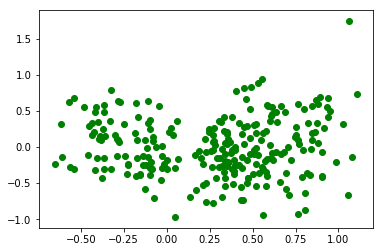

In [49]:
X_std_lda = X_std.dot(W_std)
X_std_lda[:, 1] = X_std_lda[:, 1]
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_std_lda[y==label, 0], X_std_lda[y==label, 1],
                color=color, marker=marker)
    plt.show()